In [15]:
# !pip install -Uqq torch torchaudio librosa

In [1]:
import torchaudio
import os

DATA_PATH = '/home/mayankch283/Downloads/speech_commands_v0.02'
    
sample_file = os.path.join(DATA_PATH, 'bed', '01648c51_nohash_1.wav')
print(sample_file)
waveform, sample_rate = torchaudio.load(sample_file)

print("Waveform Shape:", waveform.shape)
print("Sample Rate:", sample_rate)


/home/mayankch283/Downloads/speech_commands_v0.02/bed/01648c51_nohash_1.wav
Waveform Shape: torch.Size([1, 16000])
Sample Rate: 16000


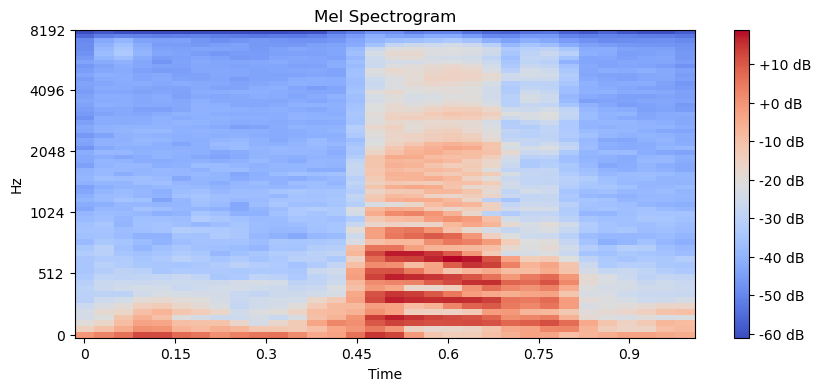

In [3]:
import librosa
import matplotlib.pyplot as plt

mel_spec = librosa.feature.melspectrogram(y=waveform.numpy()[0], sr=sample_rate, n_mels=64)
log_mel_spec = librosa.power_to_db(mel_spec)

plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spec, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


In [27]:
from torch.utils.data import Dataset, DataLoader
import torchaudio.transforms as transforms

class SpeechCommandsDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.file_paths = []
        avoid_label = ['LICENSE', 'README.md', 'testing_list.txt', 'validation_list.txt']
        for label in self.classes:
            if(label not in avoid_label):
                self.file_paths += [(os.path.join(data_dir, label, f), label) for f in os.listdir(os.path.join(data_dir, label))]

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        file_path, label = self.file_paths[idx]
        waveform, sample_rate = torchaudio.load(file_path)
        if self.transform:
            waveform = self.transform(waveform)
        return waveform, self.classes.index(label)

# Example usage
dataset = SpeechCommandsDataset(DATA_PATH, transform=transforms.MelSpectrogram())
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
